## ERA5 daily precipitation

In [1]:
import earthkit as ek

In [2]:
dataset = "reanalysis-era5-single-levels-timeseries"
request = {
    "variable": ["total_precipitation"],
    "location": {"longitude": -1, "latitude": 51.5},
    "date": ["2025-08-01/2025-08-31"],
    "data_format": "netcdf"
}

data = ek.data.from_source("cds", dataset, request)

In [4]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 9kB
Dimensions:     (valid_time: 744)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2025-08-01 ... 2025-08-31T23:...
    latitude    float64 8B ...
    longitude   float64 8B ...
Data variables:
    tp          (valid_time) float32 3kB dask.array<chunksize=(744,), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-09-02T04:48 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [5]:
import numpy as np
daily = ek.transforms.temporal.daily_mean(ds)
daily = daily.assign_coords(valid_time=daily.valid_time+np.timedelta64(12, "h"))

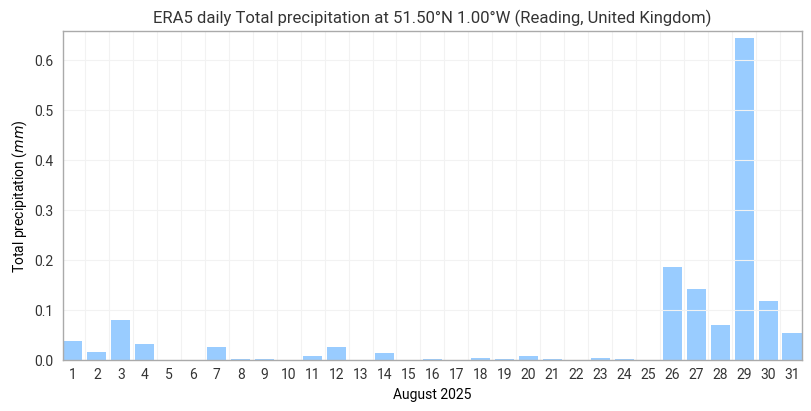

In [7]:
ek.plots.timeseries(
    daily,
    color="#99ccff",
    plot="bar",
    title="ERA5 daily {variable_name} at {latitude:%Lt} {longitude:%Ln} ({location:%c}, {location:%C})",
    xticks={
        "frequency": "D",
        "format": "%-d",
        "highlight": {"weekday": "sunday"},
        "highlight_color": "pink",
        "period": True,
    },
    xlabel="August 2025",
    yunits="mm",
).show()